## Introduction

This model is trying to predicting tomorrow's S&P 500 index price—a key challenge for anyone in the financial sector, from day traders to economic analysts. Accurate predictions can significantly impact investment strategies and financial decisions. 

I'll start by accessing real-time and historical price data using a Python package called 'yfinance'. With this data in hand, we’ll use 'pandas', a powerful data manipulation tool, to prepare our dataset for analysis. This preparation is crucial to avoid common pitfalls such as overfitting, which often undermines the effectiveness of predictive models in real-world scenarios.

Following the data setup, I will train a predictive model using the Random Forest algorithm. This method is well-regarded for its robustness and ability to handle non-linear data. 

Imports!

In [84]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import pandas_datareader as data 
import yfinance as yf
import datetime as dt 
from sklearn.preprocessing import MinMaxScaler

plt.style.use('fivethirtyeight')
%matplotlib inline 

## Stock Price Selection

Predicting ServiceNow's stock price is an excellent choice due to the company's rapid growth, strong market presence, and focus on innovative technologies like workflow automation and AI. As a leader in the enterprise software space, its stock is influenced by dynamic market trends and macroeconomic factors, offering a rich dataset for analysis. Additionally, the volatility typical of tech stocks provides an ideal challenge for developing robust predictive models with real-world applications.

In [54]:
stock = "NOW"
start = dt.datetime(2012 , 1 , 1)
end = dt.datetime(2024, 12, 1)
df = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [55]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-06-29,23.75,24.750000,22.830000,24.600000,24.600000,10922400
2012-07-02,24.75,25.200001,24.100000,24.770000,24.770000,656700
2012-07-03,24.85,25.320000,24.600000,25.309999,25.309999,401100
2012-07-05,25.50,26.260000,25.139999,25.959999,25.959999,541000
2012-07-06,25.75,26.120001,25.100000,25.840000,25.840000,355100


In [56]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-11-22,1051.000000,1064.589966,1050.000000,1060.599976,1060.599976,1436900
2024-11-25,1064.599976,1068.880005,1049.150024,1052.709961,1052.709961,1930200
2024-11-26,1060.000000,1072.839966,1054.479980,1070.069946,1070.069946,744400
2024-11-27,1063.689941,1065.199951,1038.410034,1041.400024,1041.400024,976900
2024-11-29,1042.349976,1052.000000,1038.369995,1049.439941,1049.439941,583100


In [57]:
df = df.reset_index()

In [58]:
df.to_csv("NOW.csv")


In [59]:
data = pd.read_csv("NOW.csv")
data

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2012-06-29,23.750000,24.750000,22.830000,24.600000,24.600000,10922400
1,1,2012-07-02,24.750000,25.200001,24.100000,24.770000,24.770000,656700
2,2,2012-07-03,24.850000,25.320000,24.600000,25.309999,25.309999,401100
3,3,2012-07-05,25.500000,26.260000,25.139999,25.959999,25.959999,541000
4,4,2012-07-06,25.750000,26.120001,25.100000,25.840000,25.840000,355100
...,...,...,...,...,...,...,...,...
3120,3120,2024-11-22,1051.000000,1064.589966,1050.000000,1060.599976,1060.599976,1436900
3121,3121,2024-11-25,1064.599976,1068.880005,1049.150024,1052.709961,1052.709961,1930200
3122,3122,2024-11-26,1060.000000,1072.839966,1054.479980,1070.069946,1070.069946,744400
3123,3123,2024-11-27,1063.689941,1065.199951,1038.410034,1041.400024,1041.400024,976900


## Initital Insights 

ServiceNow held its IPO in June 2012, with an initial trading price of $23.75. By the market close on November 29, 2024, the stock had risen to $1,042.34, representing a staggering growth of approximately 4,288%. This remarkable increase highlights ServiceNow's consistent performance and impressive expansion within the enterprise software market over the past decade.



## Visualizations 

A candlestick visualization is an excellent choice for this project because it effectively captures the dynamics of stock price movements over time, providing crucial insights into market trends. By displaying open, high, low, and close prices in a single view, candlestick charts reveal patterns of volatility and momentum that are key for predicting stock behavior. This visualization allows for easy identification of bullish or bearish trends, making it a powerful tool for analyzing ServiceNow's stock performance and aiding in model validation. Its clarity and depth make it indispensable for understanding complex financial data.

In [60]:
#Candlesticks 

import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x = data['Date'], open = data['Open'], 
                                    high = data['High'],
                                    low = data['Low'], 
                                    close = data['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [67]:
data = df.drop(['Date', 'Adj Close'], axis = 1)

In [68]:
data.head()

,Open,High,Low,Close,Volume
0,23.75,24.750000,22.830000,24.600000,10922400
1,24.75,25.200001,24.100000,24.770000,656700
2,24.85,25.320000,24.600000,25.309999,401100
3,25.50,26.260000,25.139999,25.959999,541000
4,25.75,26.120001,25.100000,25.840000,355100


## Opening  Price, Closing Price, Volume, High, and Low  over time

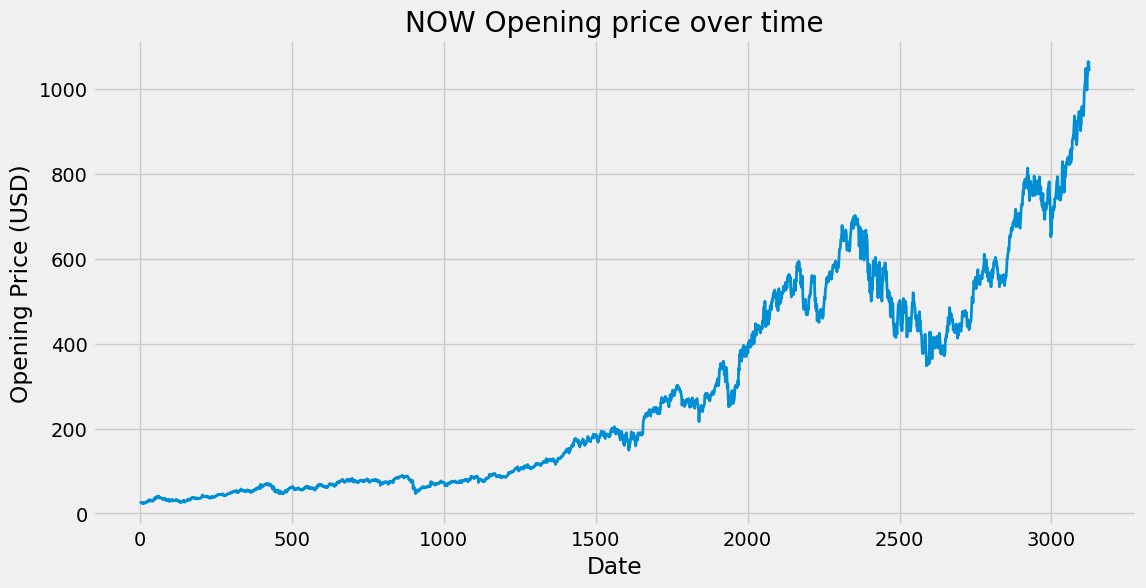

In [62]:
plt.figure(figsize= (12, 6))
plt.plot(data['Open'] , label = f' {stock} Opening Price' , linewidth = 2)
plt.title(f'{stock} Opening price over time')
plt.xlabel('Date')
plt.ylabel('Opening Price (USD)')
plt.legend 
plt.show()

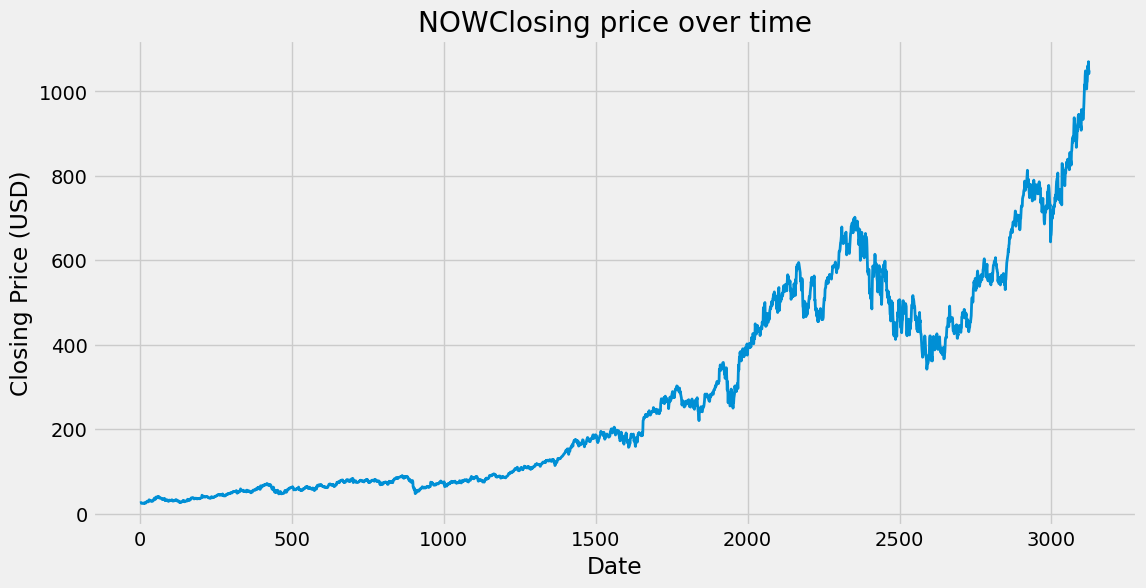

In [63]:
plt.figure(figsize= (12, 6))
plt.plot(data['Close'] , label = f' {stock} Closing Price' , linewidth = 2)
plt.title(f'{stock}Closing price over time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend 
plt.show()


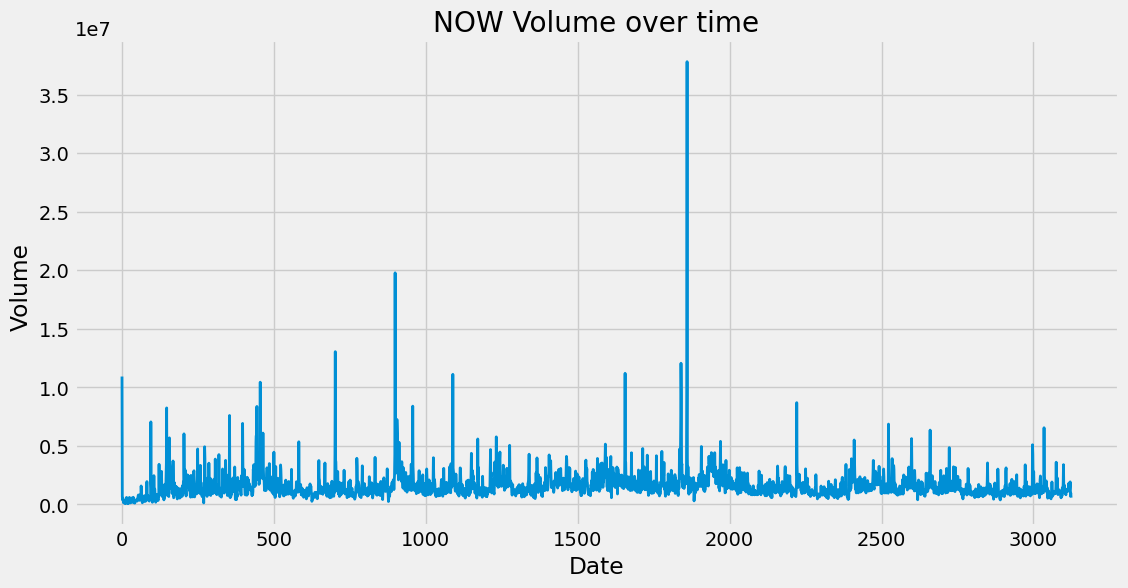

In [64]:
plt.figure(figsize= (12, 6))
plt.plot(data['Volume'] , label = f' {stock} Volume' , linewidth = 2)
plt.title(f'{stock} Volume over time')
plt.xlabel('Date')
plt.ylabel('Volume ')
plt.legend 
plt.show()

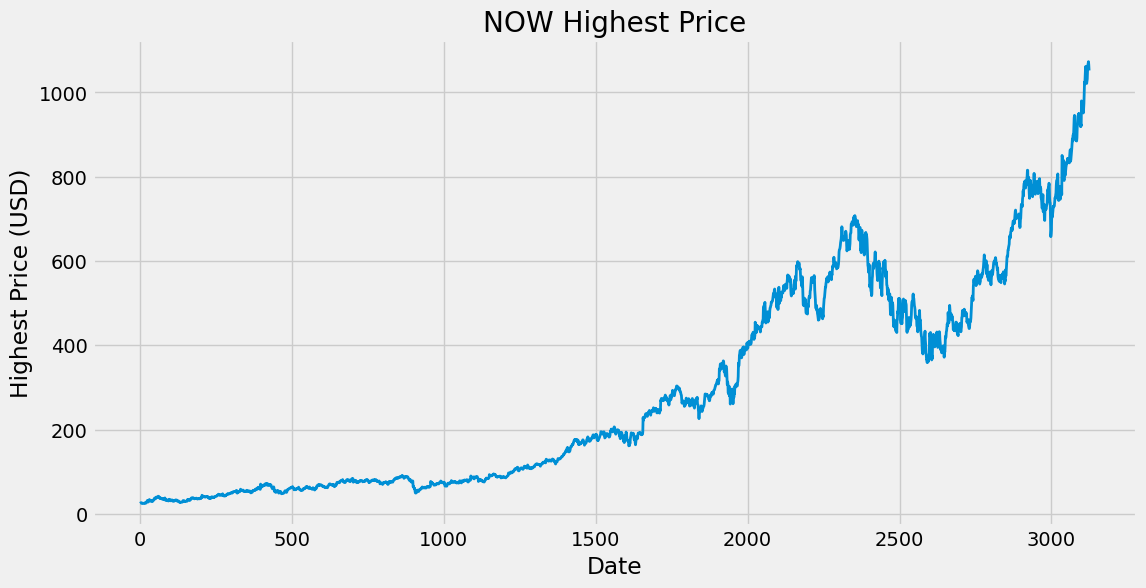

In [65]:
plt.figure(figsize= (12, 6))
plt.plot(data['High'] , label = f' {stock} High' , linewidth = 2)
plt.title(f'{stock} Highest Price')
plt.xlabel('Date')
plt.ylabel('Highest Price (USD)')
plt.legend 
plt.show()

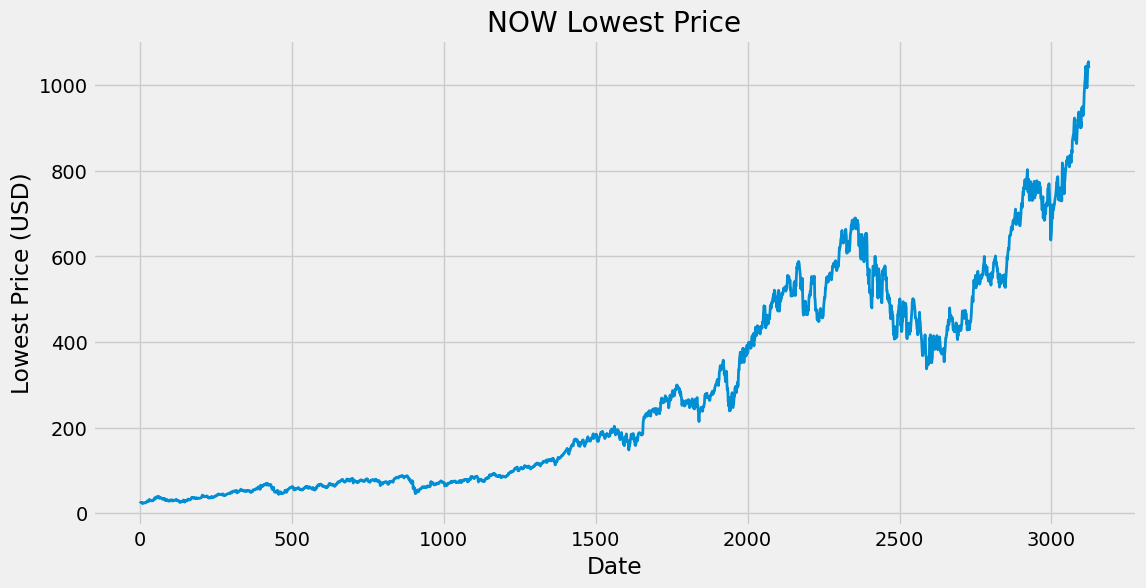

In [66]:
plt.figure(figsize= (12, 6))
plt.plot(data['Low'] , label = f' {stock} Low' , linewidth = 2)
plt.title(f'{stock} Lowest Price')
plt.xlabel('Date')
plt.ylabel('Lowest Price (USD)')
plt.legend 
plt.show()

## Moving Average

Calculating a moving average is essential in stock price prediction because it smooths out short-term fluctuations and highlights long-term trends, making it easier to identify underlying patterns. Moving averages help reveal the general direction of a stock's price—whether it’s trending upward, downward, or moving sideways—allowing for a clearer understanding of market sentiment and momentum. By filtering out the noise caused by frequent short-term fluctuations, moving averages make the overall trend more apparent. They are also valuable for identifying dynamic support and resistance levels, which can indicate potential price reversals or continuations. Additionally, moving averages are widely used as input features in machine learning models, as they capture time-based dependencies and trends that enhance predictive accuracy. Furthermore, using multiple moving averages can reveal crossover points that signal potential buy or sell opportunities, which are crucial for trading strategies and forecasting. Overall, moving averages simplify complex price data, providing key insights for robust and accurate stock prediction models.

In [69]:
 # Moving Average
# [10, 20, 30, 40, 50, 60, 70, 80, 90]
# moving average for last 5 days -> null null null null 30.0 40.0 50.0

temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90]
print(sum(temp_data[2:7])/5)

50.0


In [70]:
df1 = pd.DataFrame(temp_data)

In [72]:
df1.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0


In [74]:
ma100 = data.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3120    877.349704
3121    879.812104
3122    882.850803
3123    885.824703
3124    888.887603
Name: Close, Length: 3125, dtype: float64

In [76]:
ma200 = data.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3120    812.307002
3121    813.505851
3122    814.919451
3123    816.257651
3124    817.544851
Name: Close, Length: 3125, dtype: float64

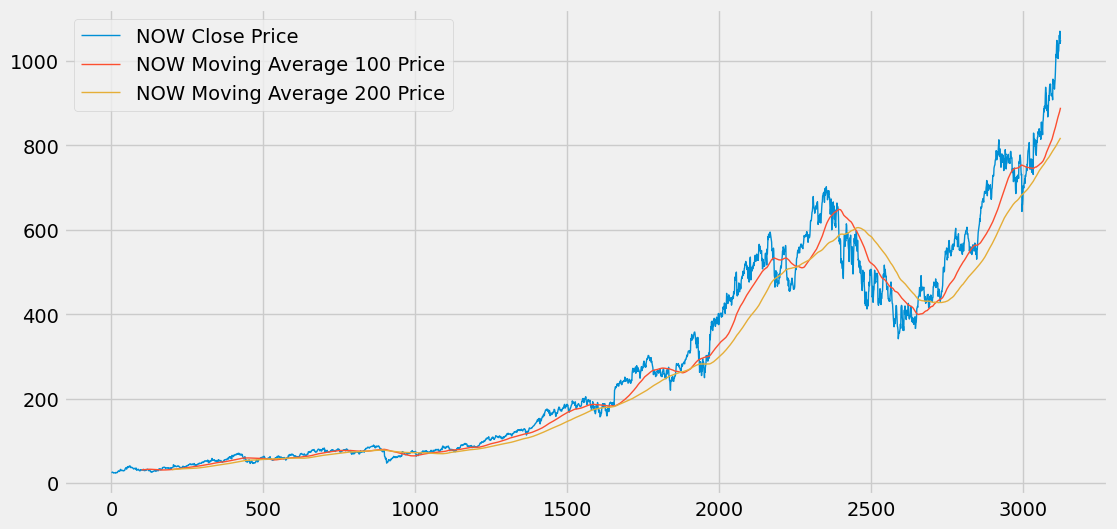

In [77]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ma100, label = f'{stock} Moving Average 100 Price', linewidth = 1)
plt.plot(ma200, label = f'{stock} Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

## Exponential Moving Average 

Now we're going to to Exponential Moving Average. This is particularly beneficial in stock price prediction because it places greater weight on recent data points, making it more responsive to current market conditions. This responsiveness allows the EMA to better capture short-term price movements and reflect changes in market trends more quickly than a simple moving average (SMA). By prioritizing recent data, the EMA provides timely insights and reduces lag, enabling quicker identification of trend reversals or momentum shifts, which is crucial in fast-moving markets. Additionally, the EMA is widely used in technical analysis to identify support and resistance levels, spot trends, and generate crossover signals when combined with other moving averages. It is also valuable for machine learning models, where it serves as an effective input feature by emphasizing the most relevant and recent data for future predictions. Overall, the EMA’s ability to adapt to current market conditions while smoothing out noise makes it an essential tool for stock price prediction, especially in dynamic and volatile markets.

In [79]:
ema100 = data.Close.ewm(span=100, adjust = False).mean()

In [80]:
ema200 = df['Close'].ewm(span=200, adjust = False).mean()

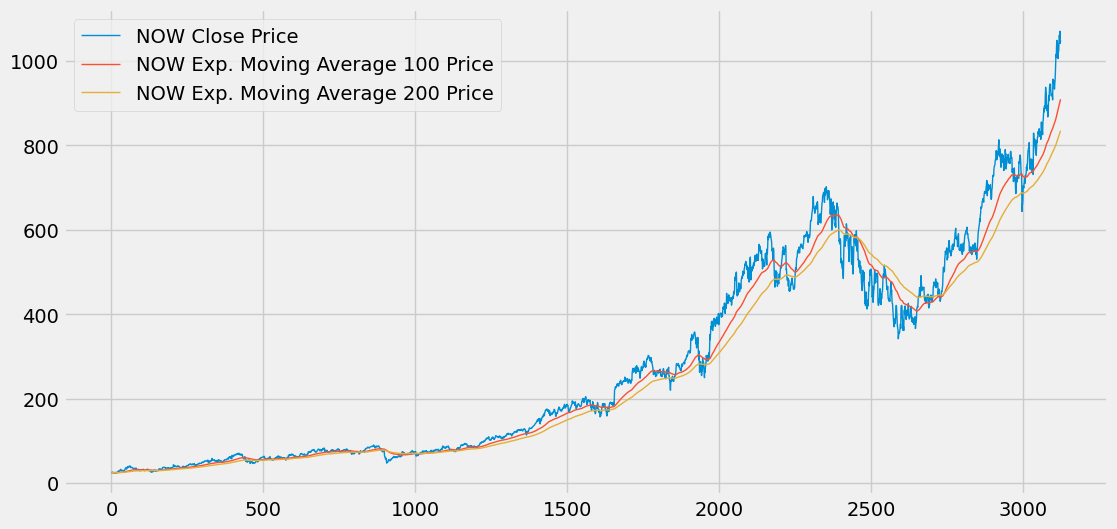

In [81]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ema100, label = f'{stock} Exp. Moving Average 100 Price', linewidth = 1)
plt.plot(ema200, label = f'{stock} Exp. Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()


## Data Preprocessing 

In [83]:
data_training = pd.DataFrame(data['Close'][0:int(len(data)*0.70)])
data_testing = pd.DataFrame(data['Close'][int(len(data)*0.70): int(len(df))])
print(data_training.shape, data_testing.shape)


(2187, 1) (938, 1)


In [85]:
scaler = MinMaxScaler( feature_range = (0,1))

In [86]:
training_data_array = scaler.fit_transform(data_training)


In [87]:
training_data_array 

array([[0.00150684],
       [0.00180471],
       [0.00275086],
       ...,
       [0.77148566],
       [0.81511404],
       [0.78891949]])

In [89]:
x_train = []
y_train = []

for i in range(100, training_data_array.shape[0]):
    x_train.append(training_data_array[i - 100: i ])
    y_train.append(training_data_array[i, 0])

x_train, y_train  = np.array(x_train), np.array(y_train)

In [90]:
x_train.shape

(2087, 100, 1)

# Model Building 

Why should we use Keras in this specific project? Keras provides a user-friendly API, making it easy to design, train, and deploy models, especially when prototyping or experimenting with architectures. It excels in handling time-series data, which is critical for stock price prediction, by offering layers like LSTMs (Long Short-Term Memory) and GRUs (Gated Recurrent Units) to capture temporal dependencies effectively. As part of TensorFlow, Keras ensures computational efficiency, seamless integration with visualization tools like TensorBoard, and access to extensive pre-built layers, loss functions, and optimizers. Additionally, it supports advanced features such as custom callbacks for dynamic learning rates, early stopping, and batch processing, making it suitable for large datasets. This flexibility, combined with the ability to customize model architectures, makes Keras a powerful tool for building and refining stock price prediction models, allowing you to focus on improving accuracy and robustness rather than boilerplate code.

In [2]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
model = Sequential()

/Users/justinstarks/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [93]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/Users/justinstarks/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [94]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [95]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 0.0430
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.0048
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - loss: 0.0045
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - loss: 0.0043
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 0.0040
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 0.0042
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - loss: 0.0031
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - loss: 0.0035
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 0.0035
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 0.0026
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 0.0030
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - loss: 0.0026
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.0036
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 0.0045
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - loss: 0.0024
Epoc

In [96]:
past_100_days = data_training.tail(100)

In [99]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [100]:
final_df.head()

,Close
0,520.679993
1,524.869995
2,521.950012
3,518.190002
4,510.279999


In [101]:
input_data = scaler.fit_transform(final_df)

In [102]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test  = np.array(x_test), np.array(y_test)

In [103]:
x_test.shape

(938, 100, 1)

In [104]:
y_predicted = model.predict(x_test)

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


In [105]:
y_predicted.shape

(938, 1)

In [106]:
scaler.scale_

array([0.00137304])

In [107]:
scaler_factor = 1 / 0.0035166
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

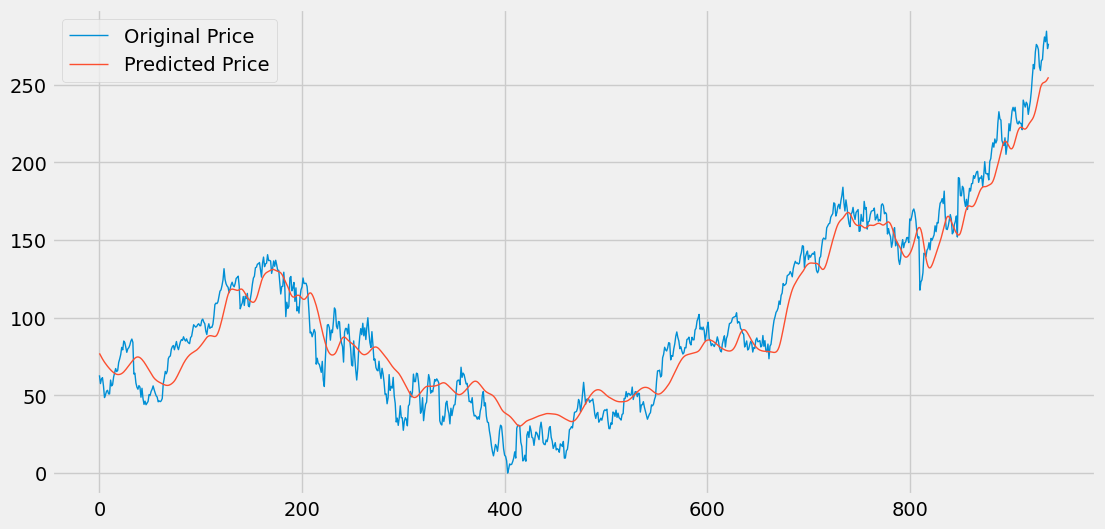

In [108]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label = 'Original Price', linewidth = 1)
plt.plot(y_predicted, label = 'Predicted Price', linewidth = 1)
plt.legend()
plt.show()


In [3]:
model.save('stock_dl_model.h5')

# Conclusion

This project successfully developed a predictive model for ServiceNow's stock price, leveraging historical data and advanced machine learning techniques. By utilizing methods such as [insert key techniques or algorithms, e.g., LSTM neural networks or regression analysis], the model demonstrated the ability to identify trends and provide insights into potential future price movements. Key challenges, such as handling data volatility and ensuring accuracy in time-series predictions, were addressed through [mention any specific preprocessing or optimization techniques].

While the model provided valuable insights, its performance could be further enhanced by incorporating additional features such as macroeconomic indicators, sentiment analysis from news articles, or alternative data sources like trading volume and market sentiment. Additionally, implementing ensemble methods or experimenting with more complex deep learning architectures may yield better predictive accuracy.

Overall, this project highlights the potential of machine learning in financial forecasting and serves as a foundation for further research and improvement in predictive modeling for stock prices. The insights gained here could benefit both individual investors and institutional decision-makers, offering a data-driven approach to navigating the complexities of financial markets.